In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('google_quarter.csv')
df.tail()

,Quarter_Date,Google_Revenue(Millions$US)
59,2006-03-31,2254
60,2005-12-31,1919
61,2005-09-30,1578
62,2005-06-30,1384
63,2005-03-31,1257


In [3]:
company_quarter= df.rename(columns={"Quarter_Date": 'ds', 
                                 "Google_Revenue(Millions$US)": 'y'})
company_quarter

,ds,y
0,2020-12-31,56898
1,2020-09-30,46173
2,2020-06-30,38297
3,2020-03-31,41159
4,2019-12-31,46075
...,...,...
59,2006-03-31,2254
60,2005-12-31,1919
61,2005-09-30,1578
62,2005-06-30,1384


In [4]:
model = Prophet()
model.fit(company_quarter)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
future = model.make_future_dataframe(periods=8, freq='Q')
future.tail()

,ds
67,2021-12-31
68,2022-03-31
69,2022-06-30
70,2022-09-30
71,2022-12-31


In [6]:
forecast = model.predict(future)

In [7]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
52,2018-03-31,31573.266294,29514.379635,33549.482568
53,2018-06-30,32977.059998,31062.944948,34893.400133
54,2018-09-30,34396.583661,32539.222915,36297.586186
55,2018-12-31,37240.535924,35337.809444,39136.086234
56,2019-03-31,37284.001931,35411.095203,39007.470299
57,2019-06-30,38984.424089,37193.706088,40735.066307
58,2019-09-30,40485.673774,38636.986927,42340.104426
59,2019-12-31,43491.876325,41423.094840,45379.012496
60,2020-03-31,42840.577305,41060.942946,44747.658246
61,2020-06-30,43414.855640,41497.747730,45327.626842


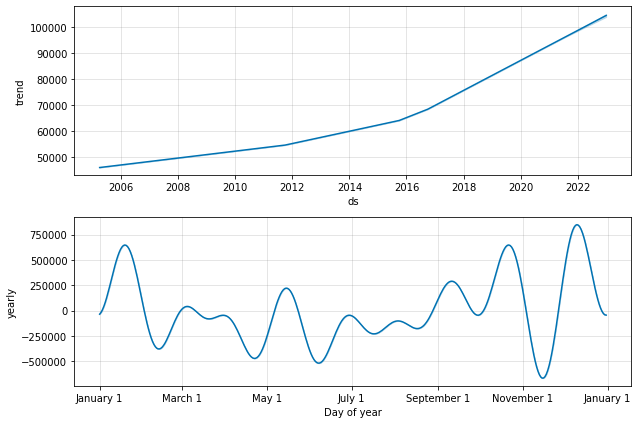

In [8]:

plot2 = model.plot_components(forecast)

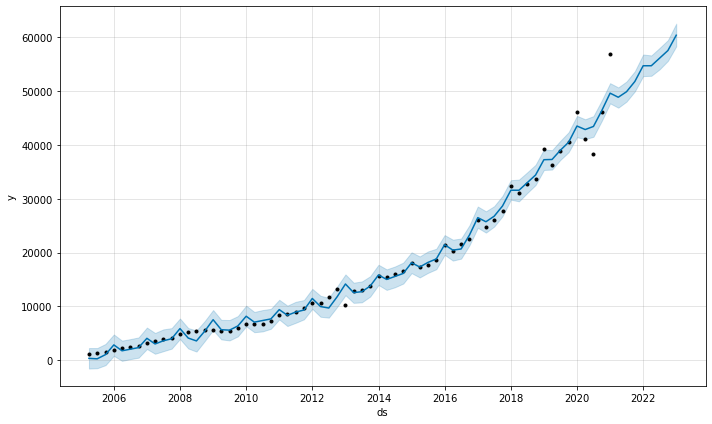

In [9]:

plot1 = model.plot(forecast)